<b><u>Getting Started</u></b>
<br>
<p>Before I could think of questions that I wanted to visualize information for, I first wanted to understand the data that I was dealing with.  Additionally, I needed to do some basic data wrangling to get the data in a usable format.  So, to load and explore the Seattle drime data set, I made use of pandas and loaded the csv file into a dataframe which seemed like a reasonable data structure to start with.</p>

In [64]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

# Load crimedata dataset
filename = 'Documents/Coursera/DataVis/seattle_full.csv'
crimedata = pd.read_csv(filename, low_memory=False)

# look at the first few lines of data
crimedata.head(10)


,RMS CDW ID,General Offense Number,Offense Code,Offense Code Extension,Offense Type,Summary Offense Code,Summarized Offense Description,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End,Hundred Block Location,District/Sector,Zone/Beat,Census Tract 2000,Longitude,Latitude,Location,Month,Year
0,483839,2015218538,2202,0,BURGLARY-FORCE-RES,2200,BURGLARY,06/28/2015 10:31:00 AM,06/28/2014 10:31:00 AM,06/28/2015 10:31:00 AM,6XX BLOCK OF NW 74 ST,J,J2,2900.3013,-122.364672,47.682524,"(47.68252427, -122.364671996)",6,2014
1,481252,2015213067,2610,0,FRAUD-IDENTITY THEFT,2600,FRAUD,06/24/2015 11:09:00 AM,06/01/2014 12:00:00 AM,06/24/2015 11:09:00 AM,23XX BLOCK OF 43 AV E,C,C2,6300.1004,-122.277080,47.639901,"(47.639900761, -122.277080248)",6,2014
2,481375,2015210301,2316,0,THEFT-MAIL,2300,MAIL THEFT,06/22/2015 09:22:00 AM,08/31/2014 09:00:00 AM,NaN,81XX BLOCK OF 11 AV SW,F,F3,11300.5013,-122.349312,47.529232,"(47.529232299, -122.349312181)",8,2014
3,481690,2015209327,2599,0,COUNTERFEIT,2500,COUNTERFEIT,06/21/2015 03:52:00 PM,06/20/2014 01:38:00 PM,NaN,6XX BLOCK OF PINE ST,M,M2,8200.1002,-122.334818,47.612368,"(47.612368448, -122.334817763)",6,2014
4,478198,2015207880,2399,3,THEFT-OTH,2300,OTHER PROPERTY,06/20/2015 11:59:00 AM,06/01/2014 11:59:00 AM,11/01/2014 12:00:00 PM,77XX BLOCK OF SUNNYSIDE AV N,J,J3,2700.2015,-122.329379,47.685960,"(47.685959879, -122.329378505)",6,2014
5,480485,2015904103,2308,0,THEFT-BUILDING,2300,OTHER PROPERTY,06/19/2015 02:55:00 PM,06/19/2014 02:45:00 PM,07/10/2014 02:45:00 PM,35XX BLOCK OF S FERDINAND ST,R,R3,10300.4006,-122.287478,47.557855,"(47.557854802, -122.287477902)",6,2014
6,470170,2015185464,2308,0,THEFT-BUILDING,2300,OTHER PROPERTY,06/04/2015 11:13:00 AM,06/01/2014 12:00:00 AM,06/01/2015 06:15:00 PM,24XX BLOCK OF WESTVIEW DR W,Q,Q2,5900.4035,-122.370773,47.640095,"(47.640094502, -122.370772861)",6,2014
7,465137,2015174988,2605,0,FRAUD-CREDIT CARD,2600,FRAUD,05/27/2015 03:45:00 PM,08/22/2014 11:00:00 AM,03/15/2015 05:30:00 PM,22XX BLOCK OF NW 59 ST,B,B1,4700.4002,-122.386164,47.671643,"(47.671642511, -122.386164453)",8,2014
8,461710,2015168191,2610,0,FRAUD-IDENTITY THEFT,2600,FRAUD,05/22/2015 10:45:00 AM,08/01/2014 12:00:00 AM,NaN,11XX BLOCK OF REPUBLICAN ST,D,D3,7300.1019,-122.333647,47.623119,"(47.62311893, -122.333646878)",8,2014
9,456091,2015157266,2606,1,FRAUD-CHECK,2600,FRAUD,05/13/2015 05:10:00 PM,07/20/2014 12:00:00 PM,NaN,31XX BLOCK OF WESTERN AV,D,D1,8001.3006,-122.356376,47.618029,"(47.618028638, -122.356375788)",7,2014


In [65]:
# look at the summary statistics
crimedata.describe()

,RMS CDW ID,General Offense Number,Offense Code Extension,Census Tract 2000,Longitude,Latitude,Month,Year
count,32779.000000,3.277900e+04,32779.000000,32645.000000,32779.000000,32779.000000,32779.000000,32779
mean,578650.325483,2.019999e+09,4.199793,6737.664956,-114.680394,44.646274,6.980933,2014
std,487673.532938,1.111669e+09,12.028941,3300.797625,29.620933,11.531858,0.812021,0
min,12470.000000,2.015135e+07,0.000000,100.100100,-122.425315,0.000000,6.000000,2014
25%,47245.500000,2.014207e+09,0.000000,4600.100000,-122.346076,47.580045,6.000000,2014
50%,999859.000000,2.014243e+09,0.000000,7500.400700,-122.328713,47.614196,7.000000,2014
75%,1030116.500000,2.014277e+09,1.000000,9200.201300,-122.307333,47.664051,8.000000,2014
max,1125252.000000,2.014142e+11,98.000000,26500.100200,0.000000,47.749606,8.000000,2014


<p>The first thing I noticed in the above is that the "Offense Description" field appeared to contain a good, generalize description of the type of crime that was occuring.  So, what I wanted to visualize first is the breakdown of the type of crime - i.e. what's most common?</p>
<br>
<p>To that end, looked at the unique crime categories</p>

In [66]:
crimedata['Summarized Offense Description'].unique()

array(['BURGLARY', 'FRAUD', 'MAIL THEFT', 'COUNTERFEIT', 'OTHER PROPERTY',
       'EMBEZZLE', 'CAR PROWL', 'THREATS', 'PROPERTY DAMAGE',
       'LOST PROPERTY', 'FORGERY', 'VEHICLE THEFT',
       'BURGLARY-SECURE PARKING-RES', 'PICKPOCKET', 'BIKE THEFT',
       'NARCOTICS', 'DISPUTE', 'ASSAULT', 'STOLEN PROPERTY',
       'WARRANT ARREST', 'TRAFFIC', 'SHOPLIFTING', 'DISTURBANCE',
       'VIOLATION OF COURT ORDER', 'ILLEGAL DUMPING', 'PROSTITUTION',
       'ROBBERY', 'TRESPASS', 'LIQUOR VIOLATION', 'BIAS INCIDENT',
       'THEFT OF SERVICES', 'HOMICIDE', 'RECOVERED PROPERTY', 'OBSTRUCT',
       'RECKLESS BURNING', 'INJURY', 'WEAPON', 'PURSE SNATCH',
       'FALSE REPORT', 'ELUDING', 'ANIMAL COMPLAINT', 'PORNOGRAPHY', 'DUI',
       'FIREWORK', '[INC - CASE DC USE ONLY]', 'PUBLIC NUISANCE',
       'DISORDERLY CONDUCT', 'ESCAPE'], dtype=object)

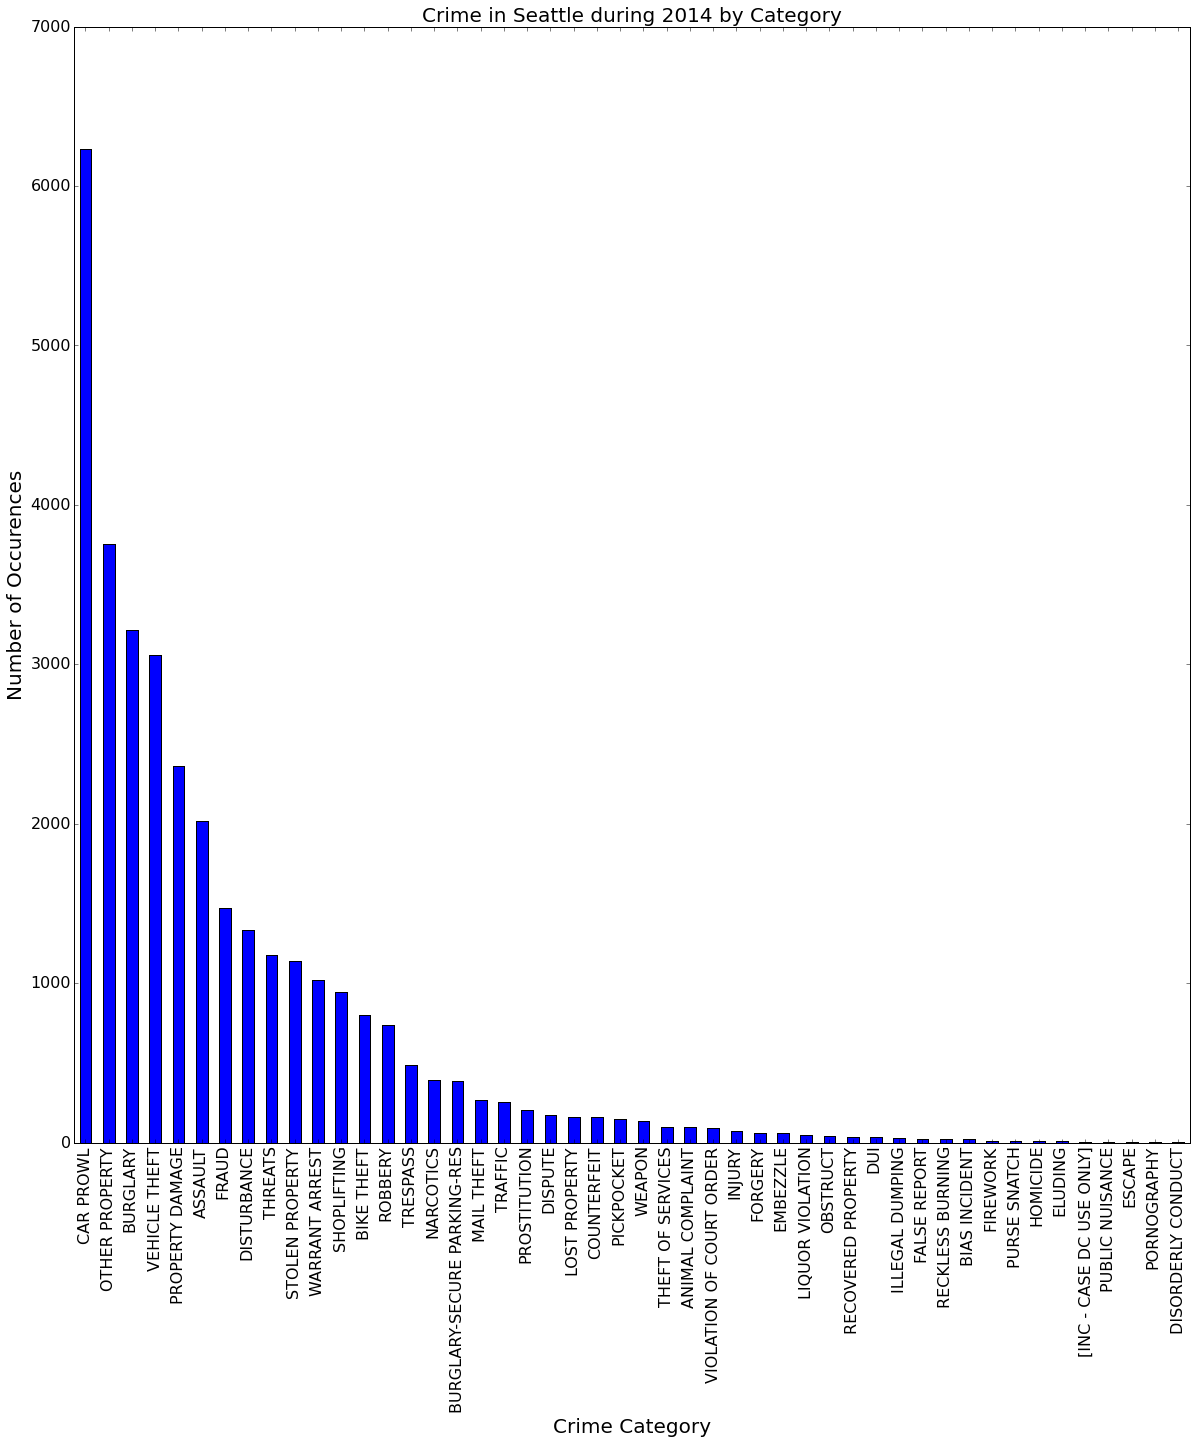

In [67]:
# get the Offense Description counts into a data column
crime_categories = crimedata['Summarized Offense Description'].value_counts()

# generate and format plot
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
crime_categories_plot = crime_categories.plot(kind='bar')
crime_categories_plot.set_xlabel("Crime Category")
crime_categories_plot.set_ylabel("Number of Occurences")
crime_categories_plot.set_title("Crime in Seattle during 2014 by Category")
crime_categories_plot.xaxis.label.set_fontsize(20)
crime_categories_plot.yaxis.label.set_fontsize(20)
crime_categories_plot.title.set_fontsize(20)

for label in (crime_categories_plot.get_xticklabels() + crime_categories_plot.get_yticklabels()):
    label.set_fontsize(16)


<p>Next, I was interested in looking at one of the high occurence categories - burglary - and trying to understand when it might be most prevalent</p>

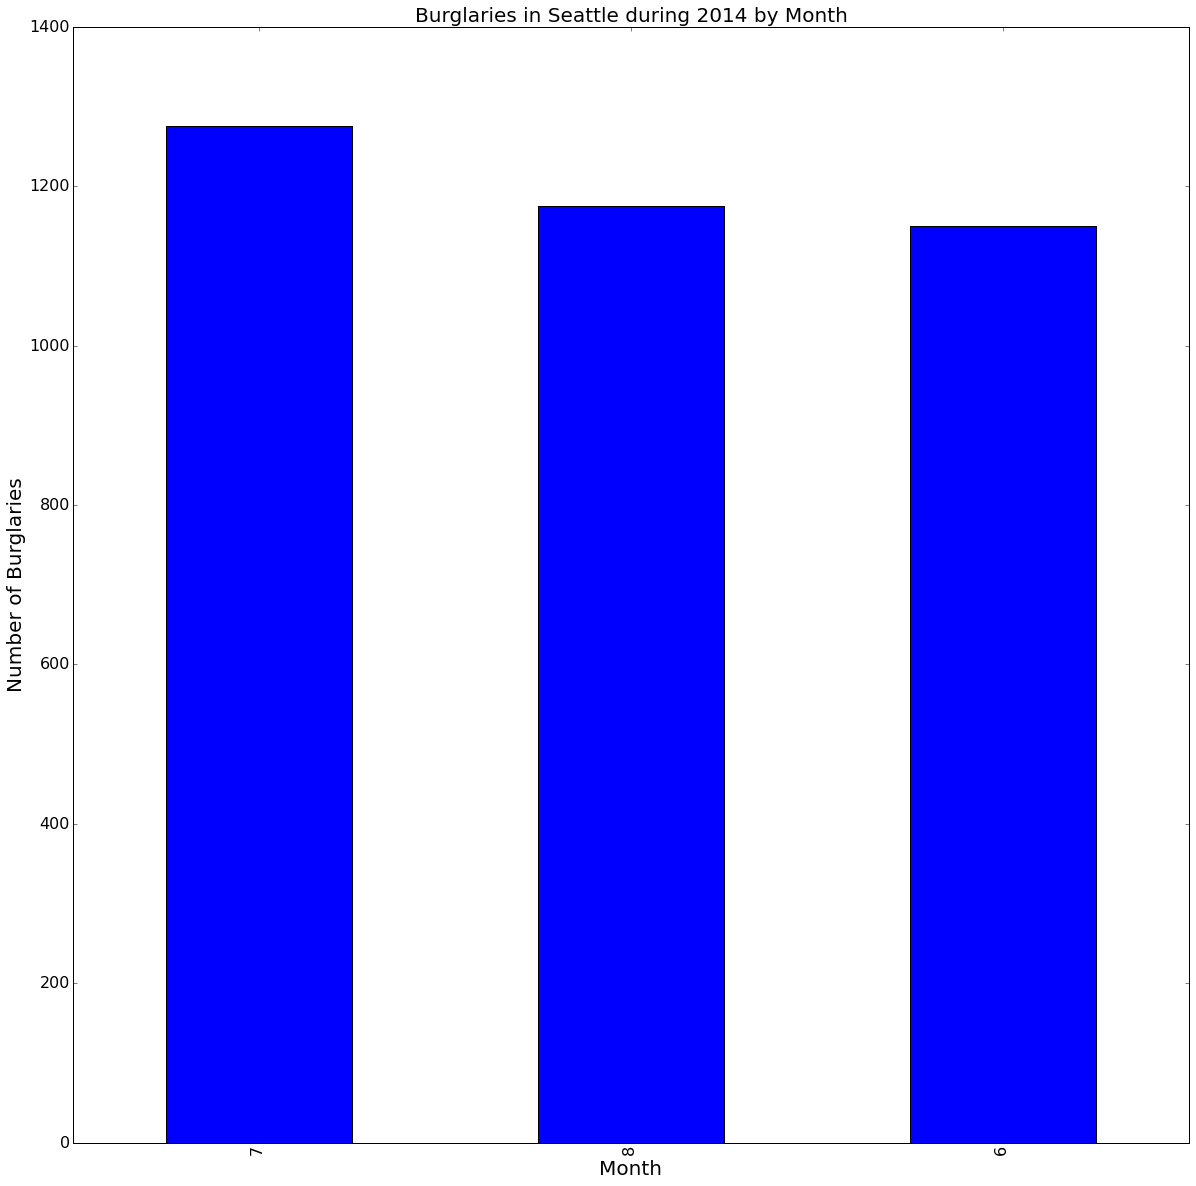

In [68]:
burglary_data = crimedata[crimedata['Summarized Offense Description'].str.contains('BURGLARY')]

# get the Month counts into a data column
burglary_months = burglary_data['Month'].value_counts()

# generate and format plot
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
burglary_months_plot = burglary_months.plot(kind='bar')
burglary_months_plot.set_xlabel("Month")
burglary_months_plot.set_ylabel("Number of Burglaries")
burglary_months_plot.set_title("Burglaries in Seattle during 2014 by Month")
burglary_months_plot.xaxis.label.set_fontsize(20)
burglary_months_plot.yaxis.label.set_fontsize(20)
burglary_months_plot.title.set_fontsize(20)

for label in (burglary_months_plot.get_xticklabels() + burglary_months_plot.get_yticklabels()):
    label.set_fontsize(16)

<p>As the above shows, the data only covers a few months and while July had the highest number of burglaries, it doesn't appear to be significant.  Next, tried looking at burglaries by district</p>

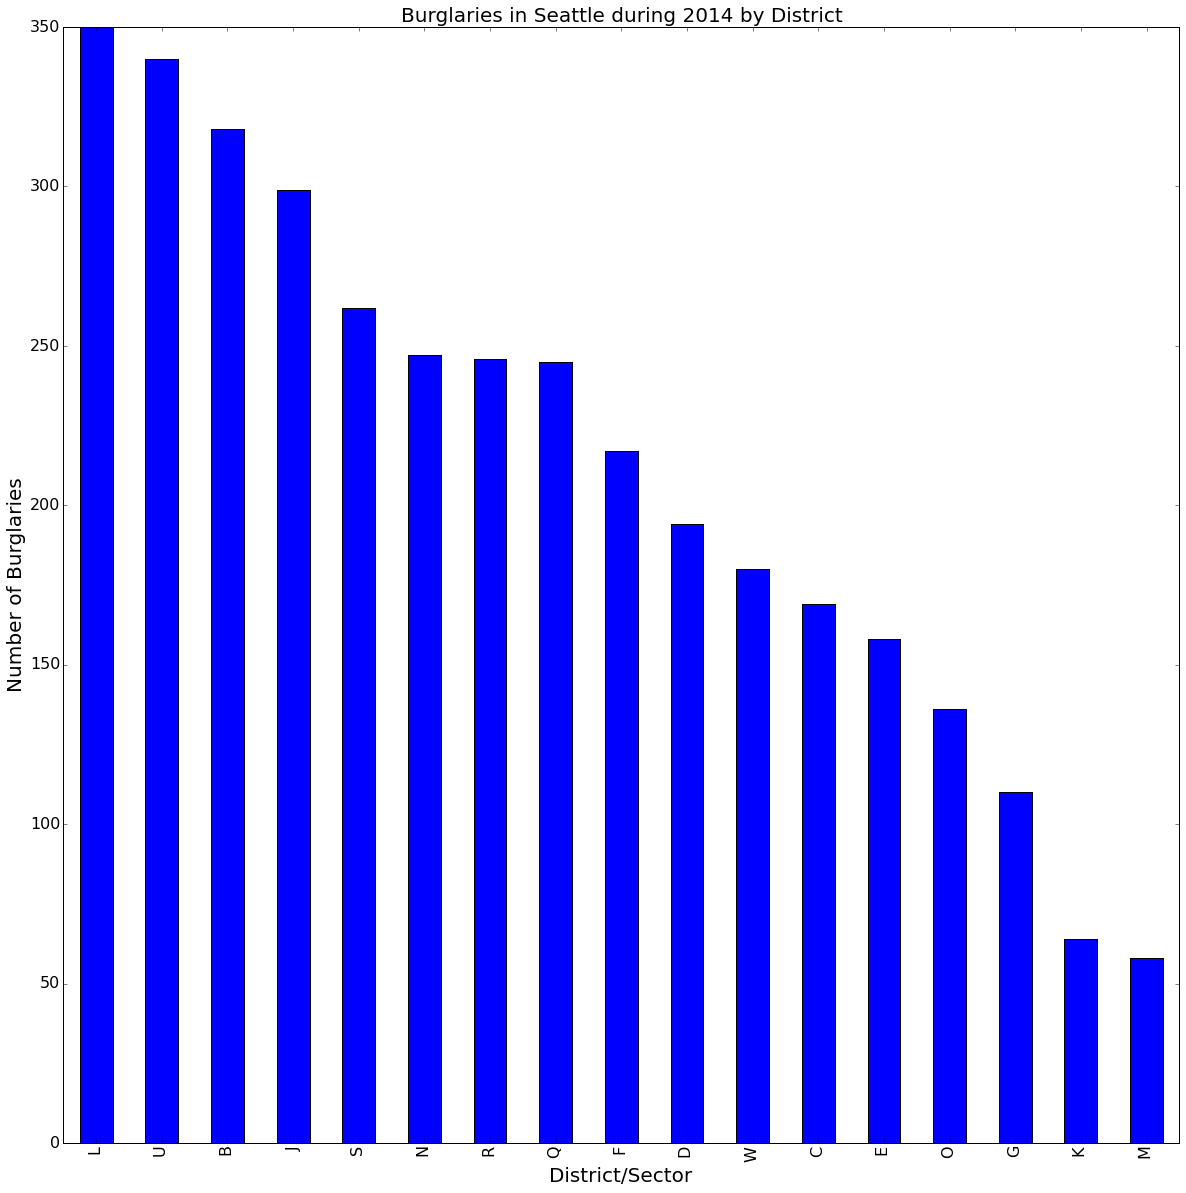

In [69]:
# get the Month counts into a data column
burglary_zones = burglary_data['District/Sector'].value_counts()

# generate and format plot
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
burglary_zones_plot = burglary_zones.plot(kind='bar')
burglary_zones_plot.set_xlabel("District/Sector")
burglary_zones_plot.set_ylabel("Number of Burglaries")
burglary_zones_plot.set_title("Burglaries in Seattle during 2014 by District")
burglary_zones_plot.xaxis.label.set_fontsize(20)
burglary_zones_plot.yaxis.label.set_fontsize(20)
burglary_zones_plot.title.set_fontsize(20)

for label in (burglary_zones_plot.get_xticklabels() + burglary_zones_plot.get_yticklabels()):
    label.set_fontsize(16)

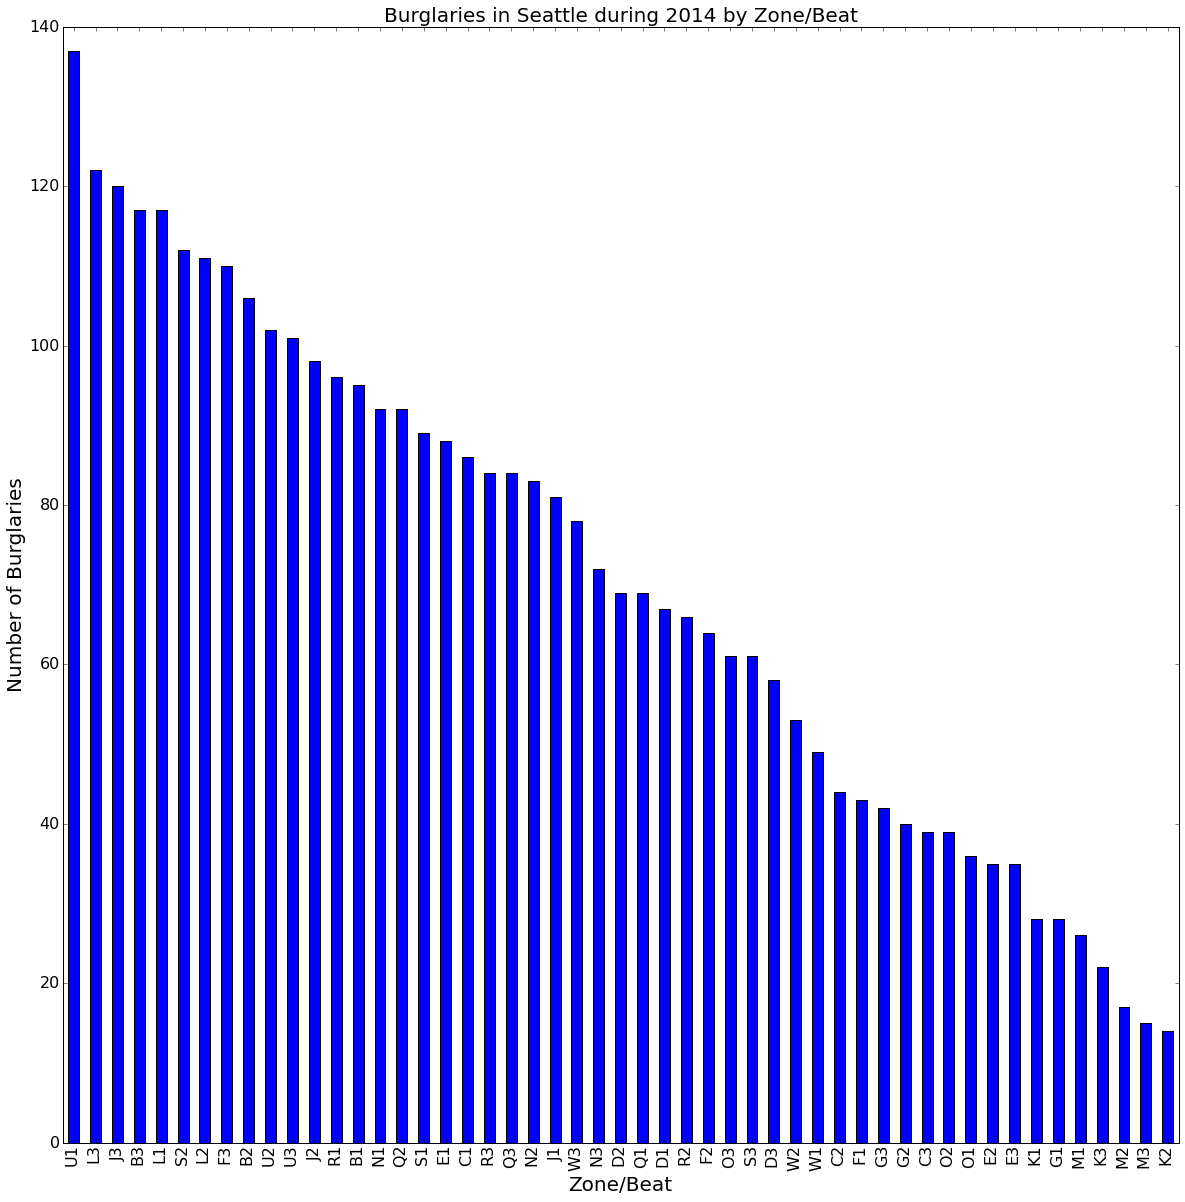

In [70]:
# get the Month counts into a data column
burglary_zones = burglary_data['Zone/Beat'].value_counts()

# generate and format plot
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
burglary_zones_plot = burglary_zones.plot(kind='bar')
burglary_zones_plot.set_xlabel("Zone/Beat")
burglary_zones_plot.set_ylabel("Number of Burglaries")
burglary_zones_plot.set_title("Burglaries in Seattle during 2014 by Zone/Beat")
burglary_zones_plot.xaxis.label.set_fontsize(20)
burglary_zones_plot.yaxis.label.set_fontsize(20)
burglary_zones_plot.title.set_fontsize(20)

for label in (burglary_zones_plot.get_xticklabels() + burglary_zones_plot.get_yticklabels()):
    label.set_fontsize(16)
